In [ ]:
from IPython.display import Image

# [1] 결정트리 (*)

## 개념/개요

- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내고 트릭 기반으로 규칙을 만들어서 분류하는 알고리즘
- 성능
    - 어떤 기준으로 규칙을 만드는가?
        => 하이퍼파라미터 사용!

- 용어 정리
    - 노드      : 가지치기를 해서 트리가 하위로 내려갈 때, 분기점, 끝점
    - 루트 노드 : 시작점, 규칙 노드이기도 함
    - 규칙 노드 : 가지치기를 하는 노드, 규칙이 존재함
        - 서브트리가 만들어짐
        - 규칙 : 피쳐들을 이용하여(결합) 조건을 생성
    - 리프 노드
        - 더이상 분기점, 가지치기 없음. 가장 끝단을 의미
        - 결정된 클래스(정답, 타겟, 레이블)을 가진다.

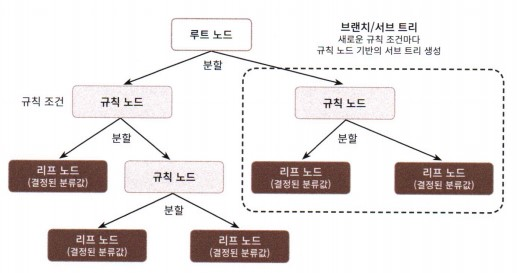

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/res/분류_결정트리.jpg')

- 특징
    - depth : 깊이
        - 깊어질수록 과적합 가능성 높음
        - 연산비용 상승 -> 적절한 임계값 필요 => 튜닝
    - 균형점
        - 트리는 좌우 트리의 균형을 유지하는것이 일반적임
        - 균형을 깨는 알고리즘 => LightGBM

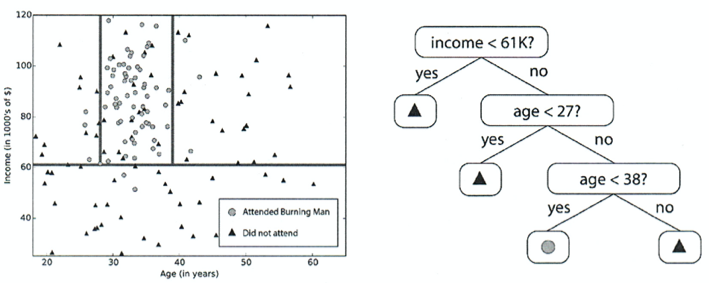

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/res/ml-의사결정트리.png')

## 목표

- 결정트리 알고리즘의 목표는 데이터의 균일도 (정보의 균일성)가 높게 되도록 데이터셋을 선택되게 규칙을 만드는것
- 규칙을 만드는 방법
    - 지수(지표)를 사용한다 -> 파라미터로 나옴
    - 1. 엔트로피를 이용한 정보이득 지수
        - 정보이득 지수 = 1-엔트로피(불순도)
        - 엔트로피 = 혼잡도(불순)
        - **정보이득 지수가 최대가 되는 쪽으로 방향성을 잡는다**
            - 엔트로피가 낮아야 정보이득이 높음
    - 2. 지니계수(기본값)
        - 값이 크다면, 불순도가 높다
        - 방향성
            - 값이 작게 -> 불순도가 작아짐

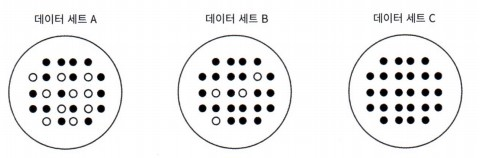

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/res/분류_결정트리2.jpg')

# 데이터 세트 A : 지니 계수
# 데이터 세트 B : 지니계수 작지는 않다
# 데이터 세트 C : 데이터가 균일하다 => 지니계수값 작다, 엔트로피 낮다, 정보이득지수는 높다

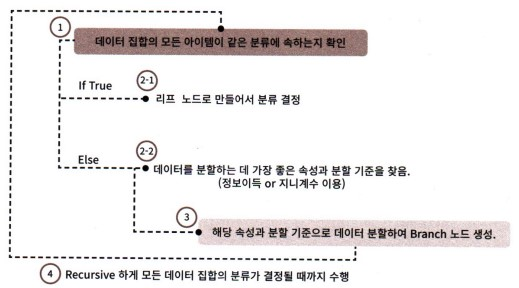

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/res/분류_결정트리3.jpg')
# 리프노드가 만들어지는 과정, 서브트리가 작동하는 원리

## 하이퍼파라미터/주요 파라미터

In [ ]:
from sklearn.tree import DecisionTreeClassifier
'''
# 주요 파라미터 확인
(*,
criterion: str = "gini", => 규칙 노드에서 서브트리 만들때 기준 지표, entropy 사용 가능
splitter: str = "best",
max_depth: Any | None = None, => 최대 깊이, 깊어질수록 과적합 확률이 높아짐, 적절, min_sample_split 제한선까지 깊어짐
min_samples_split: int = 2, => 과적합 방지용,
                            => 갯수(정수) 지정 <=> 최소 데이터가 몇개 남아 있으면 분개가 가능하도록 설정하는 값
                            => 비율(실수) 지정 <=> 0.1이면 10% 이상이면 분개 가능
min_samples_leaf: int = 1,  => 말단 노드가 되기 위한 최소 데이터 수
min_weight_fraction_leaf: float = 0,
max_features: Any | None = None, => 최대 피처(특성)의 수, 규칙을 만들 때 몇개의 피처를 사용할 것인가?
random_state: Any | None = None, => 난수 지정 (재현성, 변수 고정)
max_leaf_nodes: Any | None = None,
min_impurity_decrease: float = 0,
class_weight: Any | None = None,
ccp_alpha: float = 0
) -> None
'''


DecisionTreeClassifier()

DecisionTreeClassifier()

## 기본 적용 (베이스라인)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 1. 알고리즘 생성
model = DecisionTreeClassifier(random_state = 0)
# 2. 데이터 획득
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state = 22)

# 3. 학습
model.fit(X_train, y_train)

# 4. 예측, 성능평가
model.score(X_test, y_test)

0.9736842105263158

## 학습을 통해 완성된 트리 시각화

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(model, out_file = 'tree.model', feature_names = iris.feature_names,
                class_names=iris.target_names,filled = True)

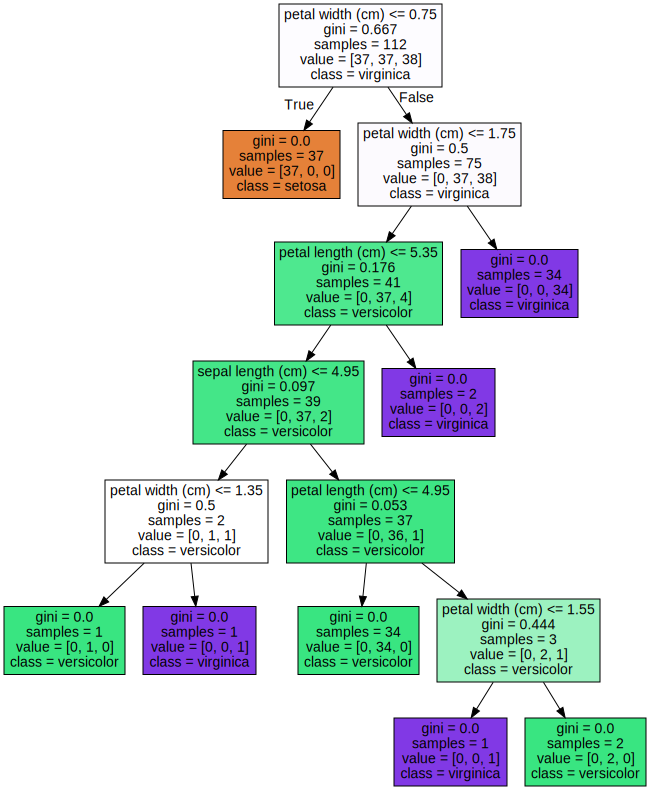

In [ ]:
# 시각화
import graphviz
with open('/content/tree.model') as f:
    gra = f.read()
graphviz.Source(gra)

## 중요 피처 체크, 불필요 피처 제거

In [ ]:
# 중요 피처 체크
import numpy as np

model.feature_importances_, iris.feature_names, np.sum(model.feature_importances_)
# petal width (cm) 항목은 93%로 높은 중요도를 보임
# sepal width (cm) 항목은 중요도가 0%로 피처를 제거해도 무방할것으로 보임 => 지금은 큰 의미 없으나 큰 데이터에서는 의미있는 속도 개선이 일어날 수 있음

(array([0.01137045, 0.        , 0.05407466, 0.93455489]),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 1.0)

<Axes: >

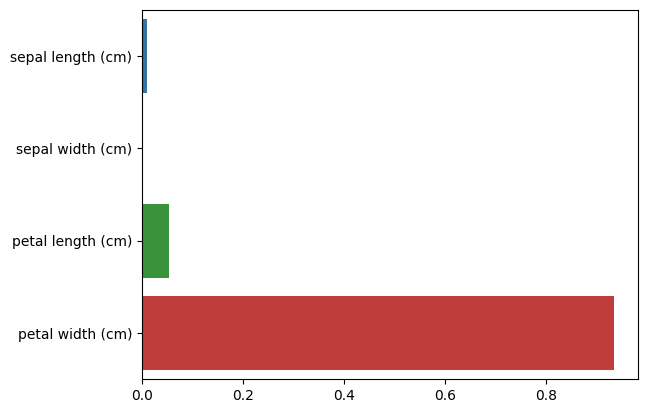

In [ ]:
# 시각화 : 피처별 중요도!
import seaborn as sns

sns.barplot(x = np.round(model.feature_importances_, 3), y = iris.feature_names)

## 분류 영역 그리기(산포도 기반)
- 데이터 분포도 상에서 레이블(정답)들에 따른 분류선들이 잘 나타나게 그린다

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
np.linspace(1,5, num = 5) # 시작/끝값, 간격 설정

array([1., 2., 3., 4., 5.])

In [ ]:
# 좌표 세트 구성
xx, yy = np.meshgrid(np.linspace(1,5, num = 5), np.linspace(20,25, num = 5))
xx, yy

(array([[1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.]]),
 array([[20.  , 20.  , 20.  , 20.  , 20.  ],
        [21.25, 21.25, 21.25, 21.25, 21.25],
        [22.5 , 22.5 , 22.5 , 22.5 , 22.5 ],
        [23.75, 23.75, 23.75, 23.75, 23.75],
        [25.  , 25.  , 25.  , 25.  , 25.  ]]))

In [ ]:
# 같은 위치에서 좌표 정보를 추출해서 점을 찍으면 -> 반복하면 -> 밀집이 되서 -> 면적 (사각형, 다각형)으로 표현 가능!
# 이를 통해서 분류 정보를 표현하고 잘 분류되었는지 시각화 할 수 있다
xx.ravel(), yy.ravel()

(array([1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2.,
        3., 4., 5., 1., 2., 3., 4., 5.]),
 array([20.  , 20.  , 20.  , 20.  , 20.  , 21.25, 21.25, 21.25, 21.25,
        21.25, 22.5 , 22.5 , 22.5 , 22.5 , 22.5 , 23.75, 23.75, 23.75,
        23.75, 23.75, 25.  , 25.  , 25.  , 25.  , 25.  ]))

In [ ]:
# 좌표화
np.c_[xx.ravel(), yy.ravel()]

array([[ 1.  , 20.  ],
       [ 2.  , 20.  ],
       [ 3.  , 20.  ],
       [ 4.  , 20.  ],
       [ 5.  , 20.  ],
       [ 1.  , 21.25],
       [ 2.  , 21.25],
       [ 3.  , 21.25],
       [ 4.  , 21.25],
       [ 5.  , 21.25],
       [ 1.  , 22.5 ],
       [ 2.  , 22.5 ],
       [ 3.  , 22.5 ],
       [ 4.  , 22.5 ],
       [ 5.  , 22.5 ],
       [ 1.  , 23.75],
       [ 2.  , 23.75],
       [ 3.  , 23.75],
       [ 4.  , 23.75],
       [ 5.  , 23.75],
       [ 1.  , 25.  ],
       [ 2.  , 25.  ],
       [ 3.  , 25.  ],
       [ 4.  , 25.  ],
       [ 5.  , 25.  ]])

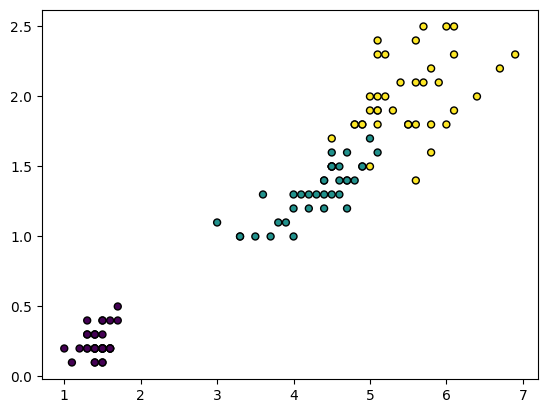

In [ ]:
def show_clf_area( clf, X, y ) :
    _ , ax = plt.subplots()
    # 산포도 (중요 피처, 1,2등 데이터만 사용)
    # zorder 값이 낮을수록 밑으로 깔린다(상대적인 값)
    # edgecolors : 테두리 설정, s : 원 크기
    ax.scatter(X[:,2],X[:,3], c = y, zorder = 5, s = 25, edgecolors = 'k')
    # x와 y축에 대한 좌표 매칭정보 획득


show_clf_area(model, X_train, y_train)

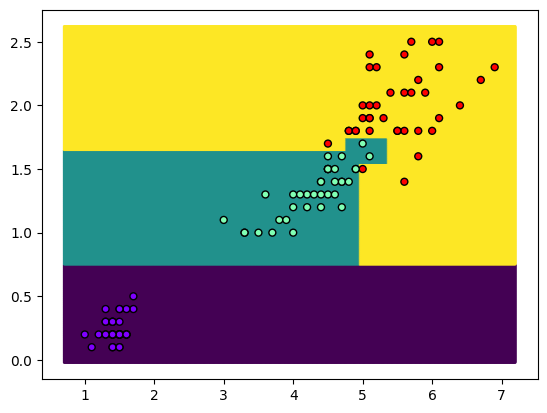

In [ ]:
def show_clf_area( clf, X, y, seg_num = 500 ) :
    _ , ax = plt.subplots()
    # 산포도 (중요 피처, 1,2등 데이터만 사용)
    # zorder 값이 낮을수록 밑으로 깔린다(상대적인 값)
    # edgecolors : 테두리 설정, s : 원 크기
    ax.scatter(X[:,2],X[:,3], c = y, zorder = 5, s = 25, edgecolors = 'k', cmap = 'rainbow')

    # x와 y축에 대한 좌표 매칭정보 획득
    x_lim_s, x_lim_e = ax.get_xlim()
    y_lim_s, y_lim_e = ax.get_ylim()
    # x와 y축 구간 나누기
    xx, yy = np.meshgrid(np.linspace(x_lim_s,x_lim_e, num = seg_num),
                         np.linspace(y_lim_s,y_lim_e, num = seg_num))
    # xx.shape => (200,200), yy.shape => (200,200)의 형태
    xy = np.c_[xx.ravel(), yy.ravel()] # (x,y)의 세트가 4000개 준비되었음 -> 화면에 점을 4000번 그린다!
    # 중요피처 2개로만 학습하고, 그림을 그려야함 => 원래 모델로 넣어서 시뮬레이션 해보자
    clf.fit(X[:, 2:], y)
    target = clf.predict(xy)
    ax.scatter(xy[:,0],xy[:,1], zorder = 1, s = 1, c = target)


show_clf_area(DecisionTreeClassifier(random_state = 0), X_train, y_train)

# [2] 앙상블

- Ensemble Learning
- 여러개의 알고리즘(분류용)을 생성 (동일 혹은 다른 알고리즘)하여 학습(기법 다양, 일반적, 메타학습)후, 각각의 모델이 예측한 값을 처리(다수결, 평균)하여 최종결과 도출
- 약한 분류기를 모아서 강한 분류기를 만드는 기법
- 신뢰성은 단일 모델보다 높다

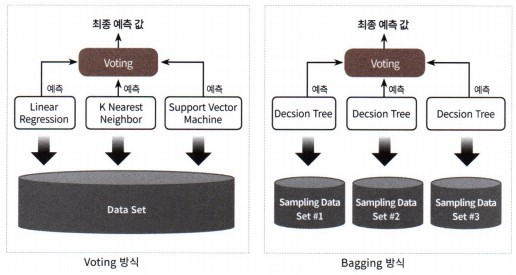

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/res/분류_앙상블1.jpg')
# 보팅 : 서로 다른 알고리즘 -> 의사결정 (하드(다수결) or 소프트(합산평균))
# 배깅 : 동일 알고리즘 -> 의사결정 (소프 트보팅 진행) -> 훈련데이터 동일(중첩되게 랜덤 처리)

## [2-1] 보팅
- Voting
- 다른 알고리즘
- 병렬 연결
- 종류
    - 하드 보팅
        - 다수결
    - 소프트 보팅
        - 하드 보팅의 문제점 개선 -> 투표는 이겼지만, 총 득표수는 적은 경우
        - 모델별 확률값을 더해서 평균처리
        - 성능이 더 좋은쪽으로 진행한다



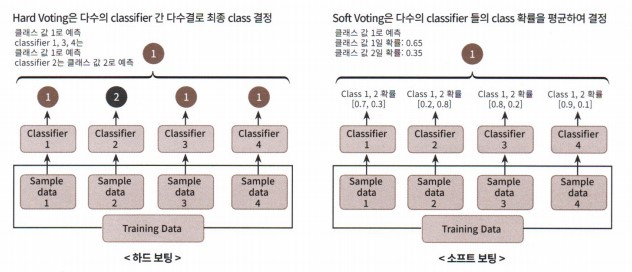

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/res/분류_앙상블2_보팅.jpg')

In [ ]:
# 보팅 구현 예시
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# 보팅 담당
from sklearn.ensemble import VotingClassifier
# 데이터셋
from sklearn.datasets import load_breast_cancer
# 데이터 split
from sklearn.model_selection import train_test_split
# 평가도구
from sklearn.metrics import f1_score, accuracy_score

# 데이터 분석용
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 로드
cancer = load_breast_cancer()

In [ ]:
# 데이터 스플릿
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [ ]:
# 층화 -> 검증 반드시 필요, 정답 데이터의 비율 체크
print(np.unique(cancer.target, return_counts=True)) # 원본데이터 정답 비율
print(np.unique(y_train, return_counts=True)) # train
print(np.unique(y_test, return_counts=True)) # test

# 대략 비슷한 비율로 y값이 분포되었음

(array([0, 1]), array([212, 357]))
(array([0, 1]), array([159, 267]))
(array([0, 1]), array([53, 90]))


In [ ]:
# soft 방식
# 모델 호출
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()

# 보팅, 각 알고리즘별 가중치 비율은 0.33, 0.33. 0.34 비율로 부여
vc_clf = VotingClassifier([('LR', lr_clf),('KNN', knn_clf),('DC', dt_clf)], voting = 'soft')
# 학습, 예측, 점수확인, 차후 개별 알고리즘 최적화 수행 후 -> 보팅 -> 다시확인
# 학습
vc_clf.fit(X_train, y_train)

# 점수
vc_clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9370629370629371

In [ ]:
# hard 방식
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
vc_clf = VotingClassifier([('LR', lr_clf),('KNN', knn_clf),('DC', dt_clf)], voting = 'hard')
# 학습
vc_clf.fit(X_train, y_train)

# 점수
vc_clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9440559440559441

## [2-2] 배깅

- Bagging
- 동일 알고리즘 n개
- 개별 모델들이 서로 다른 샘플링 데이터를 훈련에 사용
    - 단, 일부 데이터는 중첩된다
- 동일 알고리즘 n개를 소프트 보팅 수행하는 방식
- 대표 알고리즘
    - 랜덤포레스트
        - 집단 학습 기반 모델
        - 빠른 수행 속도(상대적)
        - 데이터는 랜덤으로 무작위 샘플링 수행(중복 노출 가능)

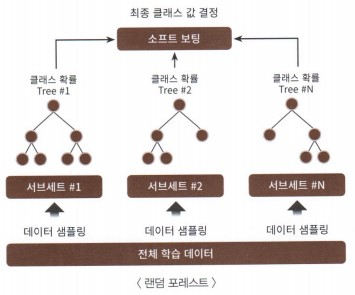

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/res/분류_앙상블2_배깅_랜덤포레스트.jpg')

- 데이터 샘플링
    - 동일 알고리즘에 서로 다른 데이터를 공급하는 방식
    - 랜덤이기 때문에 중복 데이터가 나올 수 있다
         
    - 부트스트래핑 기법
        - 데이터 세트별로 동일한 데이터가 출현
        - 데이터 세트 내에 동일 데이터가 출현
        - 데이터 부족 부분을 해결했다
         

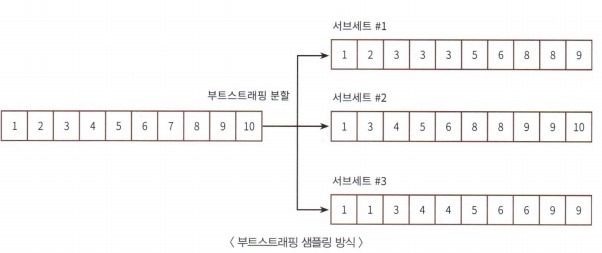

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/res/분류_앙상블2_배깅_부트스트래핑.jpg')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 0)

rf_clf.fit(X_train, y_train)

rf_clf.score(X_test, y_test)

0.9440559440559441

In [ ]:
# 피처 중요도 체크
im = pd.Series(rf_clf.feature_importances_, index = cancer.feature_names)
im = im.sort_values( ascending = False )
im

worst perimeter            0.195366
worst radius               0.125422
worst concave points       0.101498
mean concave points        0.092007
mean concavity             0.080562
worst area                 0.074379
mean perimeter             0.069298
mean area                  0.041130
mean radius                0.029691
area error                 0.023038
worst concavity            0.021721
radius error               0.021363
mean texture               0.017209
worst texture              0.017049
perimeter error            0.013548
worst smoothness           0.009489
worst fractal dimension    0.008700
worst compactness          0.008652
mean compactness           0.006369
compactness error          0.005932
mean smoothness            0.005004
concavity error            0.004687
mean symmetry              0.004352
mean fractal dimension     0.004284
texture error              0.004205
worst symmetry             0.003994
symmetry error             0.003081
smoothness error           0

<Axes: >

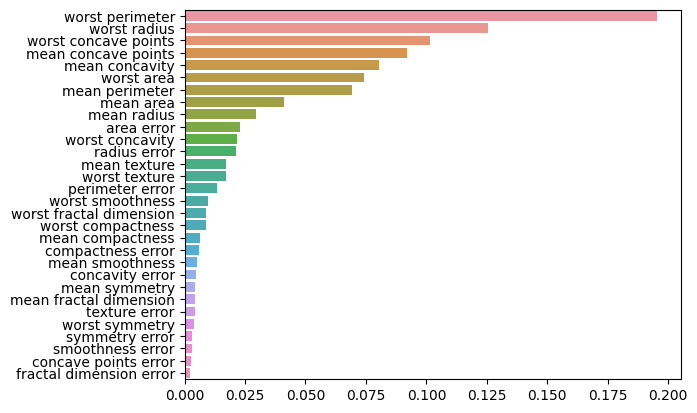

In [ ]:
sns.barplot(x = im, y = im.index)

## [2-3] 부스팅 (*)

- Boosting
- 근 4~5년간 캐글대회나 기타 결과물에서 가장 많은 선택을 받고 있다 (b/c) 높은 성능

<br/>

- 원리
    - 여러개의 약한 분류기를 순차적으로(직선적) 학습 및 예측 수행
    - 잘못 예측한 오차값들이 발생
    - 이런 데이터에 **가중치를 부여해 오류를 개선**
        - 미세조정을 수행한다
        - 학습에 반영
    - 학습 시간이 길어진다


###[2-3-1] AdaBoost(초기모델)

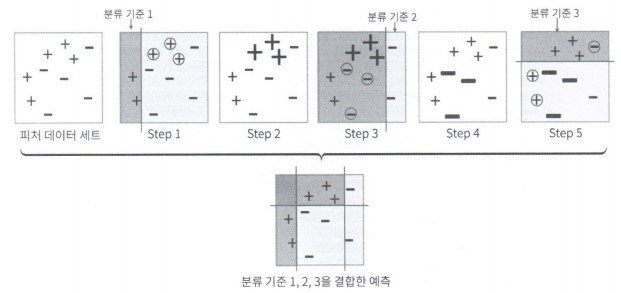

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/res/분류_앙상블3_부스트.jpg')

# 아래 과정이 반복되면서 정확도가 상승(모델 성능 상승) -> 학습 시간이 오래걸린다
# 부스트 계열들은 가중치를 어떻게 계산, 업데이트 하는지 방법론이 모두 다르다 => 모델이 나뉜다

### [2-3-2] GBM

- Gradient Boost Machine
- AdaBoost와의 차이점은 가중치 업데이트 방식의 차이다
    - 오차값이 최소로 나오도록 처리하는 방식
    - 오차값 = 실제값 - 예측값

- **경사하강법(SGD)**을 사용!
    - 딥러닝 최적화 기법을 도입
    - 특정값 필요 (학습률, eta, learning rate 등 0.001 부여)
    - 기본값 부여 -> 학습 -> 오차값 체크 -> 미세조정(학습율을 0.001 간격으로 조정) -> 학습 진행 -> ... 반복 -> 특정단계에서 마무리 => 오차값이 최소가 될때까지
    - 학습 시간이 오래걸린다
    - 이 값을 추적해보면 기울어진 형태를 가진다


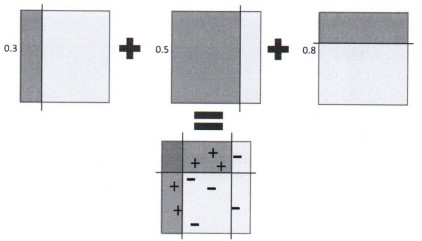

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/res/분류_앙상블3_부스트2.jpg')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
%%time

# 데이터 로드
cancer = load_breast_cancer()

# 데이터 스플릿
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


# 모델
gb_clf = GradientBoostingClassifier(random_state = 0)

# 학습
gb_clf.fit(X_train, y_train)

# 예측 및 정확도 확인
gb_clf.score(X_test, y_test)

CPU times: user 472 ms, sys: 1.22 ms, total: 473 ms
Wall time: 472 ms


0.958041958041958

### [2-3-3] XGBoost (*)
- 분류에서 믿고 가는 XGBoost
- GBM 개선
    - 느린 학습 속도 개선(상대적)
        - 병렬 학습이 가능하도록 기능 제공
            - 학습 효율의 극대화
    - 과적합 방지 방식 도입

- 특징
    - 하이퍼파라미터는 GBM과 동일
        - 추가된 기능 존재
            - 과적합방지 파라미터 (L1, L2 추가)
    - 딥러닝의 학습 테크닉중 조기학습 종료 기능 추가

- API 종류
    - 파이썬 wraping
        - DMatrix 타입으로 데이터 공급받는다
        - 자체 포맷 존재
    - 사이킷런 warping

#### 주요 파라미터

- **booster (부스팅 알고리즘)**
  - 트리기반모델 : 'gbtree' or 'dart'
  - 선형기반모델 : 'gblinear'(잘 사용않함)
  - **기본값 : 'gbtree'**
  - 특징 : 'gbtree' + dropout(과적합방지를 위해 특정 비율로 학습 방해 => 'dart'

- **objective (훈련목적)**
  - **회귀** : 'reg:squarederror' (기본값)
  - 확률값을 구하는 **이진분류** : 'binary:logistic'
  - 소프트맥스 함수(지분율계산)를 사용하는 **다중분류** : 'multi:softmax'
  - 확률값을 구하는 다중분류 : 'multi:softprob'


- **eta(learning_rate)**
  - 학습 비율 가중치를 조정하는 값
  - 부스팅 스텝을 반복하면서, **모델을 업데이트 하는데 사용하는 비율**
  - 기본값 : 0.3
  - 범위 : 0 ~ 1
  - 통상 : **0.0001 ~ 0.1 사용**

- **min_child_weight**(기본값 1)
  - **과대 적합 방지값(값이 클수록)**
  - 0 이상값 설정
  - 하위 노드단에서 요구되는 최소 가중치의 합
  - 각 노느단계에서 W가 생성이 될것이고, 그 값들을 미세 조정하게 되는데, 하위 노드단에서 그 단계까지 오는 모든 가중치의 합에 대한 제한값
  - 값이 너무 크면 언더피팅(과소적합)에 걸릴수 있다

- max_depth
  - 트리의 깊이
  - 과대 적합을 제어하는 파라미터
  - **기본값 6, 3 ~ 10일반적으로 사용**
  - 깊어지면 메모리 사용량이 급격히 많아짐(학습 속도 저하)

- max_leaf_nodes
  - 리프 노드의 최대 개수

- gamma(기본값 0)
  - 노드가 분할시 필요한 최소 감소값 지정(적용해 보면서 변화를 체크)
  - 손실 감소가 gamma보다 크면 노드 분할
  - **값이 클수록 과대 적합 방지 효과 있음**

- subsample(기본값 1)
  - 개별 트리를 훈련할때 사용할 데이터 샘플링 비율
  - 전체 데이터에서 얼마나 샘플링 할지
  - 0 ~ 1 사이값
  - 0.5 -> 전체 데이터 50% 사용하
  - **0.6 ~ 1 사용**

- colsample_bytree
  - 각 트리에서 피처 샘플링 비율
  - 전체 피처에서 얼마나 샘플링 할지
  - 기본 1, 0~1
  - **0.6 ~ 1 일반적으로 사용**

- lambda
  - 가중치에 대한 **L2 규제 조정값 (릿지 알고리즘)**
  - 값이 크면 **과대적합 방지효과** 있음
  - 기본 1

- alpha
  - 가중치에 대한 **L1 규제 조정값 (라쏘 알고리즘)**
  - 값이 크면 **과대적합 방지**효과 있음
  - 기본 1

- scale_pos_weight
  - 불균형 데이터 가중치 조정값
  - 타깃갓이 불균형할때 양성값에 이 값을 가중치를 줘서 균형을 맞춤
  - **데이터 분포에대한 불균형을 맞춰주는 지표**
  - 일반적으로 0보다 큰값을 부여한다
  - 기본값 1

- random_state
  - 랜덤시드

#### 학습 파라미터 (xgboost의 특징)

- 알고리즘의 각 단계에서 최적화를 목표로 사용하는 파라미터, 이런 학습시 파라미터들은 보통 딥러닝 학습에서 많이 활용된다


- objective -> 입력 데이터에 대비하여 설정
  - 기본값 (reg:linear)
  - binary:logistic : 이진 분류를 위한 로지그틱회귀, 분류에 대해 예측된 확률값을 반환한다
  - multi:softmax   : softmax를 사용한 다중 클레스 분류, 분류에 대해 예측된 클레스(정답)을 반환한다
  - multi:softprob  : softmax과 유사하지만, 각 클레스에 대한 예상 확률을 반환한다

- eval_metric : 평가도구, 성능평가지표
  - 회귀 분야 -> 손실함수 -> 값을 줄이는데 방점
    - rmse : root mean square error : 정답과 예측값 사이의 오차율 -> 작을수록 -> 예측값이 정답에 가깝다
    - mse  : mean square error : 평균 제곱근 오차
    - mae  : mean absolute error : 평균 절대값 오차
  - 분류 분야
    - logloss : 기본값
    - error
    - merror
    - mlogloss
    - auc

- seed
  - 난수 시드
  - 재현성 -> 동일한 결과를 매번 낼수 있는가? -> 실험환경에 대한 중요한 파라미터, 모든 조건을 고정하고 한개의 파라미터를 수정하면서 테스트 한다면, 해당 파라미터가 성능에 어떤 영향을 미치는지 확인 가능 -> 데이터의 재현성이 필요하다!

In [ ]:
# 파이썬 wraping
import xgboost as xgb
xgb.__version__

'1.7.6'

In [ ]:
# 데이터 준비 -> 자체 포맷 -> 데이터 공급자 역할
data_train = xgb.DMatrix(data = X_train, label = y_train)

data_test = xgb.DMatrix(data = X_test, label = y_test)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
params = {
    'objective':'binary:logistic', # 이진분류 데이터
    'eval_metric':'logloss', # 평가도구 -> 손실값 계산(실제 - 예측) -> 최적화시 가중치 조정
    'max_depth': 6, # 트리의 최대 깊이
    'eta':0.1, # 0.001 ~ 0.1 사이값 부여 미세조정, 기본값과 동일
    'early_stopping_rounds': 10 # 조기학습종료 체크를 위해 변동없는 학습회수를 10회로 체크
}

# 검증용 데이터를 별도로 구성하지 않아서 테스트용 데이터를 그냥 사용해보자 우선, 차후 교체 필요
data_val = data_test
evals = [(data_train,'train'),(data_val,'eval')]

# num_boost_round : XG 부스팅 알고리즘이 최적 분류를 하기 위해서 몇번이나 미세조정을 수행할것인지 => 많으면 과대적합 위험성 상승, 기본값 : 10
xgb_model = xgb.train(params=params, dtrain = data_train, num_boost_round = 400, evals=evals)

[03:51:24] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping_rounds" } are not used.

[0]	train-logloss:0.60812	eval-logloss:0.61815
[1]	train-logloss:0.53587	eval-logloss:0.55096
[2]	train-logloss:0.47700	eval-logloss:0.50028
[3]	train-logloss:0.42499	eval-logloss:0.45303
[4]	train-logloss:0.38119	eval-logloss:0.41454
[5]	train-logloss:0.34238	eval-logloss:0.38095
[6]	train-logloss:0.30929	eval-logloss:0.35511
[7]	train-logloss:0.27914	eval-logloss:0.32995
[8]	train-logloss:0.25280	eval-logloss:0.30739
[9]	train-logloss:0.23018	eval-logloss:0.29068
[10]	train-logloss:0.20901	eval-logloss:0.27283
[11]	train-logloss:0.19054	eval-logloss:0.25762
[12]	train-logloss:0.17430	eval-logloss:0.24471
[13]	train-logloss:0.15923	eval-logloss:0.23215
[14]	train-logloss:0.14657	eval-logloss:0.22441
[15]	train-logloss:0.13443	eval-logloss:0.21453
[16]	train-logloss:0.12381	eval-logloss:0.20593
[17]	train-logloss:0.11418	eval-logloss:0.19832
[18]	train-logloss:0.10558	eval-logloss:0.19209

In [ ]:
# train-logloss:0.00536	eval-logloss:0.15012
# train logloss와 eval logloss의 차이를 좁히고 조기학습 종료되게 데이터를 늘려서 테스트
# 예측 평가 진행
y_pred = xgb_model.predict(data_test)
y_pred # 0.5보다 크면 1, 작으면 0이다

array([9.9951756e-01, 4.2682260e-04, 2.0238168e-04, 9.9843425e-01,
       9.6459119e-03, 9.9855357e-01, 4.1104420e-04, 1.4173724e-04,
       4.9267639e-04, 9.9897587e-01, 1.5933493e-04, 2.2814833e-04,
       9.9839622e-01, 6.2115576e-02, 9.9976617e-01, 9.9974173e-01,
       9.9943393e-01, 9.0809201e-04, 7.6652580e-01, 7.0693693e-04,
       9.9525589e-01, 1.6551273e-04, 1.8320665e-03, 9.9984288e-01,
       9.9989963e-01, 1.2149855e-04, 9.9850094e-01, 5.6401497e-01,
       9.9979454e-01, 2.6714175e-03, 6.9138288e-01, 9.9987757e-01,
       9.2114240e-01, 9.9986255e-01, 9.9985409e-01, 9.9979061e-01,
       3.4546474e-04, 3.9355570e-04, 2.8308012e-04, 9.9483985e-01,
       1.6934631e-04, 1.4312466e-03, 4.1404209e-04, 3.7395942e-03,
       9.9948466e-01, 9.9964607e-01, 9.9641114e-01, 2.3787090e-01,
       2.7549821e-01, 9.9979371e-01, 1.9383295e-03, 9.9975544e-01,
       9.9991858e-01, 9.9978417e-01, 9.9812323e-01, 9.9981028e-01,
       9.9932158e-01, 9.9841714e-01, 9.3071377e-01, 9.9966967e

In [ ]:
# 0.5보다 크면 1, 아니면 0으로 재구성
y_preds = [1 if x > 0.5 else 0 for x in y_pred]
y_preds[:10]

[1, 0, 0, 1, 0, 1, 0, 0, 0, 1]

In [ ]:
accuracy_score(y_test, y_preds)

0.965034965034965

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

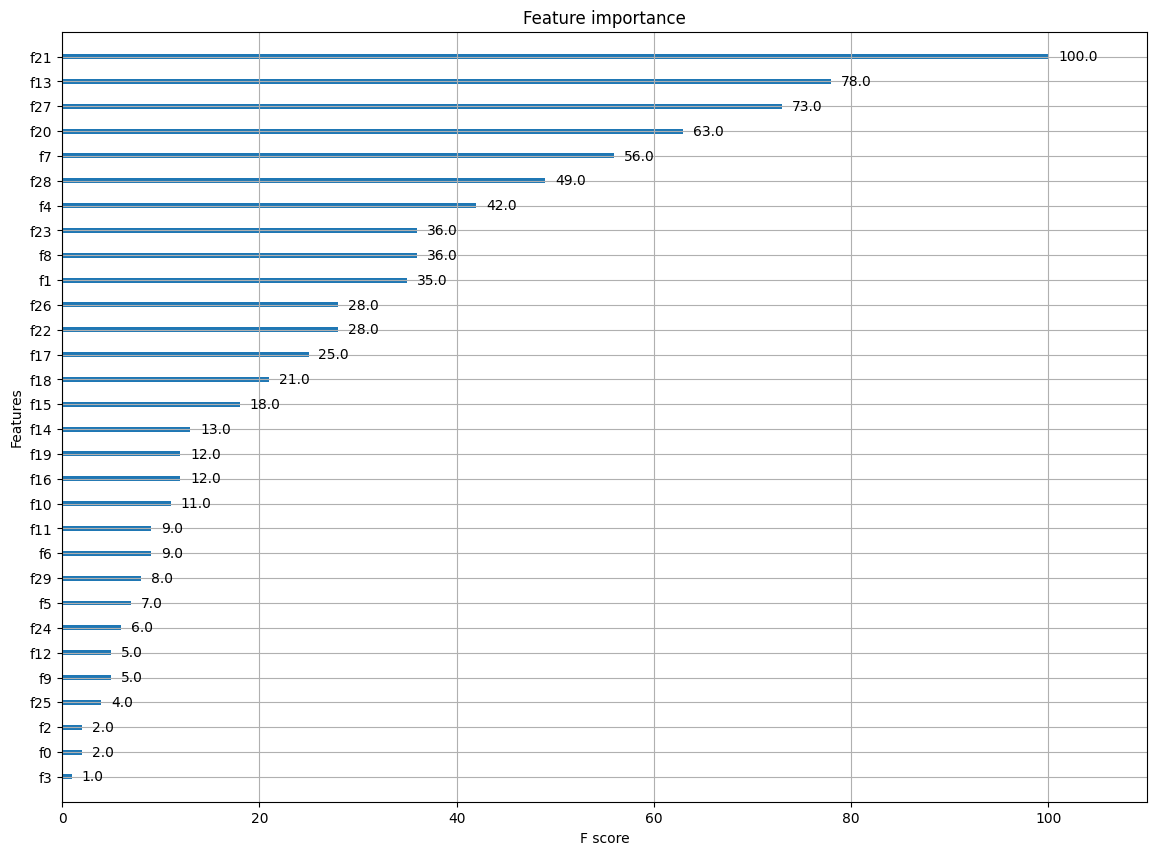

In [ ]:
# 변수 중요도
from xgboost import plot_importance

_,ax = plt.subplots(figsize = (14,10))
plot_importance(xgb_model, ax = ax)

# 핓명이 번호로 표기되어 있음(단점)

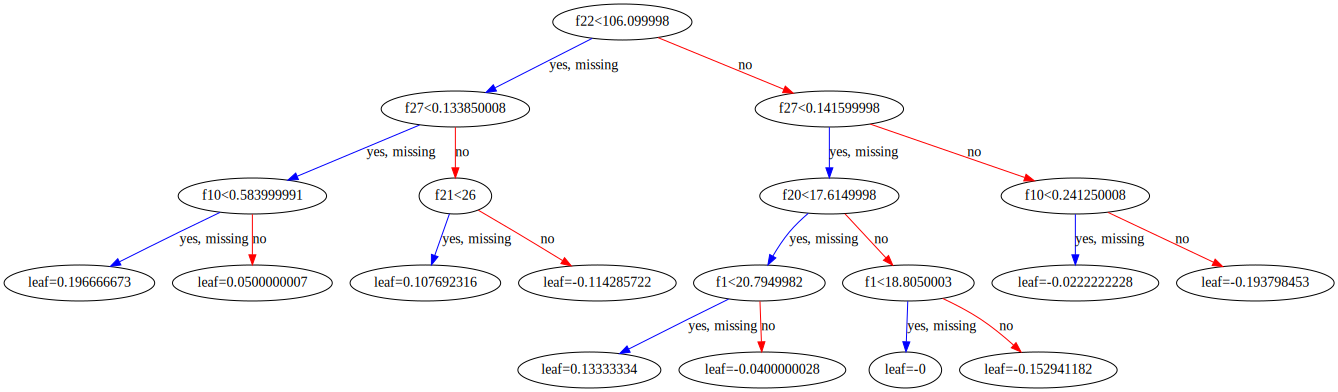

In [ ]:
from xgboost import to_graphviz

to_graphviz(xgb_model)
# 가중치 조정을 통해서 학습완료된 규칙노드의 조건들이 시각회 되었다.

In [ ]:
# xg부스트에서 교차검증 수행 -> 훈련데이터는 3세트로 구분해서 2개는 훈련, 1개는 검증 진행한다.
xgb.cv(params = params, dtrain = data_train, num_boost_round =400, nfold =  3)

[04:02:40] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping_rounds" } are not used.

[04:02:40] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping_rounds" } are not used.

[04:02:40] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping_rounds" } are not used.



,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.608339,0.001436,0.615945,0.002429
1,0.538008,0.002339,0.551923,0.003594
2,0.478754,0.002642,0.499525,0.006507
3,0.428757,0.003429,0.454921,0.007928
4,0.384959,0.003459,0.416099,0.010507
...,...,...,...,...
395,0.007887,0.000117,0.093923,0.040504
396,0.007887,0.000117,0.093923,0.040504
397,0.007887,0.000117,0.093923,0.040504
398,0.007887,0.000117,0.093923,0.040504


In [ ]:
%%time
# 데이터 로드
cancer = load_breast_cancer()

# 데이터 스플릿
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# 사이킷런 wraping 스타일
from xgboost import XGBClassifier

# 모델 생성
xgb_clf = XGBClassifier(n_estimators = 400, random_state = 0)

eval_set = [(X_test, y_test)] # 검증용 데이터가 없어서 임시 구성

# 학습
xgb_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_set = eval_set, verbose = True, eval_metric = 'logloss')

# 예측
accuracy_score(y_test, xgb_clf.predict(X_test))
# logloss가 234회에서 변하지 않는데, early stopping이 발동한것으로 생각해볼 수 있다.

[0]	validation_0-logloss:0.49281
[1]	validation_0-logloss:0.36713
[2]	validation_0-logloss:0.29354
[3]	validation_0-logloss:0.25124
[4]	validation_0-logloss:0.21513
[5]	validation_0-logloss:0.19098
[6]	validation_0-logloss:0.18009
[7]	validation_0-logloss:0.16516
[8]	validation_0-logloss:0.15830
[9]	validation_0-logloss:0.15547
[10]	validation_0-logloss:0.15807
[11]	validation_0-logloss:0.15631
[12]	validation_0-logloss:0.15388
[13]	validation_0-logloss:0.15541
[14]	validation_0-logloss:0.15384
[15]	validation_0-logloss:0.15072
[16]	validation_0-logloss:0.15273
[17]	validation_0-logloss:0.15510


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.15542
[19]	validation_0-logloss:0.15454
[20]	validation_0-logloss:0.15483
[21]	validation_0-logloss:0.15288
[22]	validation_0-logloss:0.15278
[23]	validation_0-logloss:0.15532
[24]	validation_0-logloss:0.15407
[25]	validation_0-logloss:0.15399
[26]	validation_0-logloss:0.15060
[27]	validation_0-logloss:0.15202
[28]	validation_0-logloss:0.15241
[29]	validation_0-logloss:0.15258
[30]	validation_0-logloss:0.15251
[31]	validation_0-logloss:0.15335
[32]	validation_0-logloss:0.15294
[33]	validation_0-logloss:0.15472
[34]	validation_0-logloss:0.15176
[35]	validation_0-logloss:0.15192
[36]	validation_0-logloss:0.15250
[37]	validation_0-logloss:0.15183
[38]	validation_0-logloss:0.15221
[39]	validation_0-logloss:0.14960
[40]	validation_0-logloss:0.15032
[41]	validation_0-logloss:0.15110
[42]	validation_0-logloss:0.15074
[43]	validation_0-logloss:0.15111
[44]	validation_0-logloss:0.15260
[45]	validation_0-logloss:0.15232
[46]	validation_0-logloss:0.15269
[47]	validatio

0.958041958041958

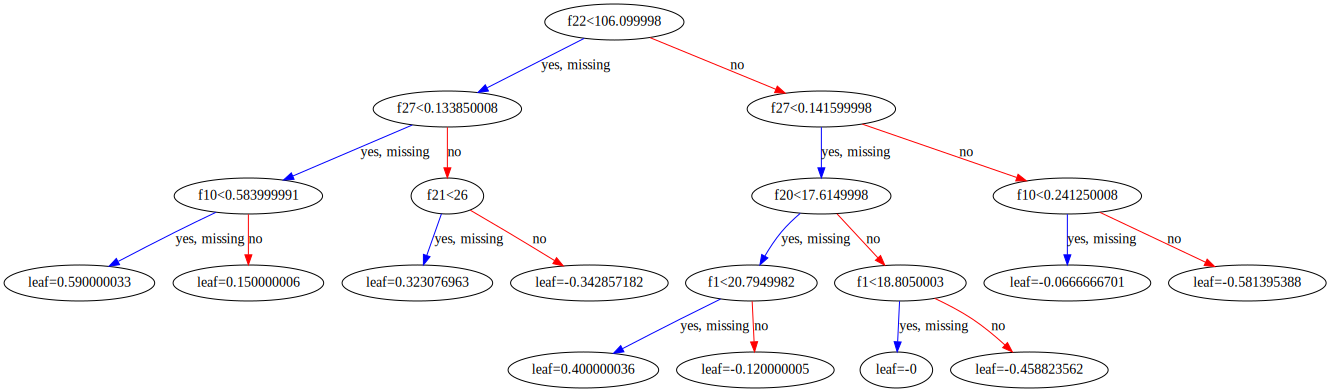

In [ ]:
to_graphviz(xgb_clf)

### [2-3-4] LightGBM(LGBM) (*)
- MS 개발, 부스팅 계열에서는 빠른편에 속함
- XGBoost 개선
    - 학습시간단축(속도개선)
    - 복잡한 하이퍼파라미터 개선(간결)

- 특징
    - 균형(X) -> 성능(O)
    - 리프 중심의 비대칭 구조로 진행
    - 연산 비용 절감
    - 가지치기(서브트리) 행위가 줄어든다

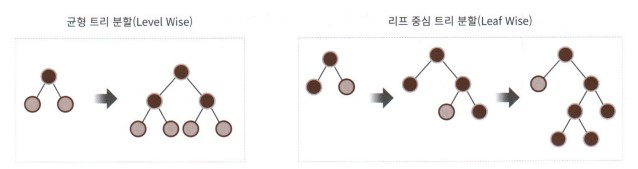

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/res/분류_앙상블3_lightGBM.jpg')

In [ ]:
%%time

# 파이썬 래핑, sklearn 래핑 모두 존재
from lightgbm import LGBMClassifier
# 데이터 로드
cancer = load_breast_cancer()

# 데이터 스플릿
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# 모델 생성
lgb_clf = LGBMClassifier(n_estimators=400)


eval_set = [(X_test, y_test)] # 검증용 데이터가 없어서 임시 구성
# 학습
lgb_clf.fit(X_train, y_train, eval_set = eval_set,  eval_metric = 'logloss')

# 평가
accuracy_score(y_test, lgb_clf.predict(X_test))

[LightGBM] [Info] Number of positive: 267, number of negative: 159
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4272
[LightGBM] [Info] Number of data points in the train set: 426, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626761 -> initscore=0.518344
[LightGBM] [Info] Start training from score 0.518344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

0.951048951048951

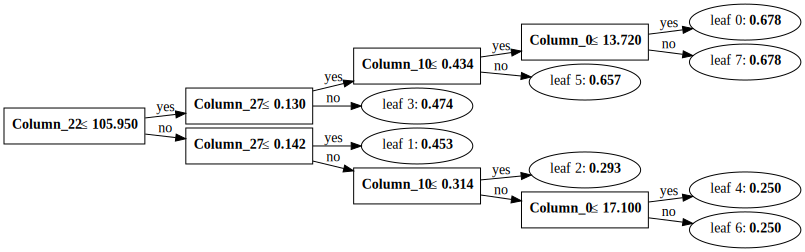

In [ ]:
from lightgbm import create_tree_digraph
create_tree_digraph(lgb_clf)
# 트리 외부는 5depth까지 진행, 중앙부분은 2depth로 마무리해서 규칙노드가 완료됨 -> 비대칭구조확인

### [2-3-5] 써드파트 (sklearn에 포함되지 않은 요소들)

#### [2-3-5-1] CatBoost (*)
- 파이캐럿, AutoML에서 선택 가능

## [2-4] 스태킹

- stacking
- 특징
    - 2단계 구조로 모델 구성
    - 1차 모델의 예측결과가 2차 모델의 훈련데이터가 된다
    - 메타 학습 기법
- 모델
    - 1차
        - 기본 데이터 주입 => 학습, 예측 서로 다른 알고리즘 활용
    - 2차
        - 예측결과를 학습데이터로 활용
        - 학습, 예측 => 최종 처리

* 정확도가 한계에 가까워졌을때 활용 가능!
* 패키지는 따로 없고 직접 구현하여 활용할 수 있다.

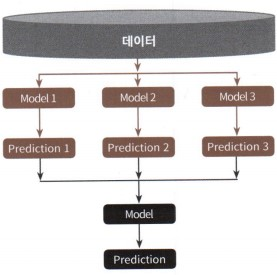

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/res/분류_앙상블3_스테킹1.jpg')

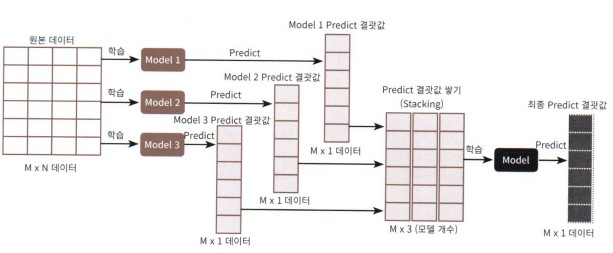

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/res/분류_앙상블3_스테킹2.jpg')

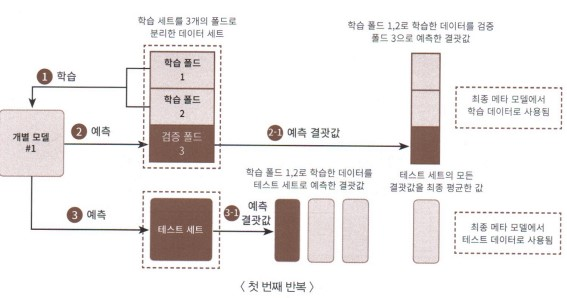

In [ ]:
# cv를 활용한 스태킹
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/res/분류_앙상블3_스테킹3.jpg')

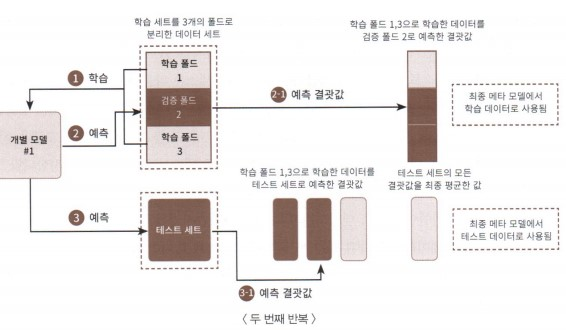

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/res/분류_앙상블3_스테킹4.jpg')

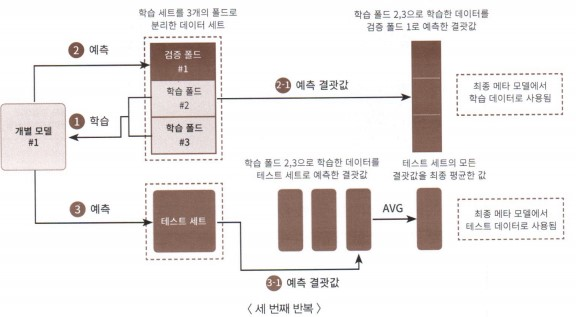

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/res/분류_앙상블3_스테킹5.jpg')

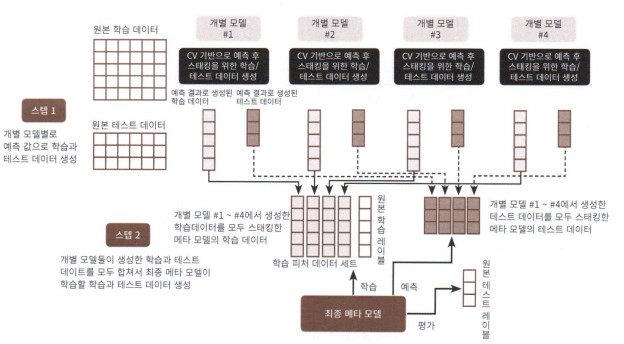

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/res/분류_앙상블3_스테킹6.jpg')

#### 1차 모델 구현

In [ ]:
# 구현
%%time
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
#from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
# 데이터 로드
cancer = load_breast_cancer()

# 데이터 스플릿
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# 1차 모델 알고리즘 준비
knn_clf = KNeighborsClassifier(n_neighbors=4)
dc_clf = DecisionTreeClassifier(max_depth=6)
ada_clf = AdaBoostClassifier(n_estimators=100)
rf_clf = RandomForestClassifier(n_estimators=100, random_state = 0)

# 1차 모델 학습 -> (2차 모델 훈련데이터, 2차모델 테스트 데이터)
def make_stacking_model_1_data(clf, train_x, train_y, test_x, nfolds = 7):
    '''
        파라미터
            - clf:모델, train_x:훈련용피처, train_y:훈련용정답, test_x : 테스트용피처, nfolds:교차검증용세트수
    '''
    # K폴드 -> 데이터는 7세트 구성
    kf = KFold(n_splits = nfolds, shuffle = False)
    # 예측결과를 담는 그릇 준비
    # 총 7번 반복, 1/7씩 세팅 => 1/7  * 7= 1 (모든 데이터에 대해 예측수행 완료)
    train_fold_valid_pred = np.zeros((train_x.shape[0],1))
    # 테스트 데이터의 예측결과를 담을 그릇(테스트데이터수, 7 = nfolds)
    test_pred = np.zeros((test_x.shape[0],nfolds))

    # 7회 반복, 전체 데이터를 7등분해서 1개는 검증, 나머지는 훈련용으로 분할 -> 7회 순환
    for idx, (train_idx, valid_idx) in enumerate(kf.split(train_x)):
        # 데이터 추출
        X_tr = train_x[train_idx] # 훈련용 피처 데이터 추출
        y_tr = train_y[train_idx] # 훈련용 정답 데이터 추출
        X_val = train_x[valid_idx] # 검증용 피처 데이터 추출
        # 학습
        clf.fit(X_tr, y_tr)
        # 검증데이터를 넣어서 예측 -> 0과 1의 예측값을 반환한다
        v_pred = clf.predict(X_val)
        # 검증 데이터로 예측한 결과를 버퍼(그릇)에 담는다
        # 1차원으로 나온 결과 (61,) => (426,1) 여기에 index대로 대입해야함
        # 1. 차원을 맞춘다 2. 특정 위치에 대입한다 => 7회 반복하면 값(0 or 1)로 세팅됨
        train_fold_valid_pred[valid_idx,:] = v_pred.reshape(-1,1)

        # 테스트데이터를 현재 모델에 넣어서 예측 => 그릇에 담아서
        # test_pred 는 현재 (143,7)
        # 첫번째 학습 => (143, 0) 여기에 결과가 세팅
        # 두번쨰 학습 => (143,1) 여기에 결과가 세팅
        # ...
        # 총 세트를 마무리 하면 (143,7)에 0과 1 결과가 모두 담김!
        test_pred[:,idx] = clf.predict(test_x)

    # 총 7세트 학습 완료
    # test_pred => (143,7) => mean => (143,1)
    # test 데이터 예측 결과 평균 수행
    test_pred_avg = np.mean(test_pred, axis = 1).reshape(-1,1) # 수평으로 평균

    # 리턴 (426,1) (143,1)
    return train_fold_valid_pred, test_pred_avg

    pass

# 모델 -> 7세트 수행 -> X_train 데이터의 세트를 이용하여 학습, 검증수행 -> 결과 = knn_train, dc_train, ...
# 모델 -> 7세트 수행 -> X_test 데이터를 이용하여 예측 7번 -> 평균 -> 1개의 결과
knn_train, knn_test = make_stacking_model_1_data(knn_clf,X_train, y_train, X_test)
dc_train, dc_test = make_stacking_model_1_data(dc_clf,X_train, y_train, X_test)
ada_train, ada_test = make_stacking_model_1_data(ada_clf,X_train, y_train, X_test)
rf_train, rf_test = make_stacking_model_1_data(rf_clf,X_train, y_train, X_test)

CPU times: user 5.94 s, sys: 2.36 ms, total: 5.95 s
Wall time: 6.32 s


In [ ]:
# 개수 확인 이상 없음
knn_train.shape, knn_test.shape

((426, 1), (143, 1))

#### 2차모델 구현

In [ ]:
from sklearn.linear_model import LogisticRegression

# 데이터 병합 -> 훈련용, 테스트용 피처 데이터 생성
X_train_stacking = np.concatenate( (knn_train,dc_train,ada_train,rf_train), axis = 1)
X_test_stacking = np.concatenate((knn_test,dc_test,ada_test,rf_test), axis = 1)

X_train_stacking.shape, X_test_stacking.shape

((426, 4), (143, 4))

In [ ]:
# 모델 생성
lr_clf = LogisticRegression()

# 학습
lr_clf.fit(X_train_stacking, y_train)

# 예측
accuracy_score(y_test, model.predict(X_test_stacking))

0.9440559440559441